### Using Threshold

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

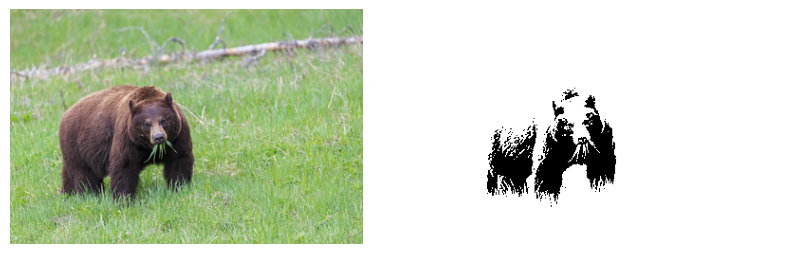

In [7]:
im = cv2.imread('imgs/bear.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

# ret, thresh = cv2.threshold(im, 50, 100, 50, cv2.THRESH_TRIANGLE)
ret, thresh = cv2.threshold(im_gray, 70, 255,  cv2.THRESH_BINARY)

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(im)
ax[0].axis("off")
ax[1].imshow(thresh, cmap='gray')
ax[1].axis("off")
plt.show()

In [8]:
im.shape, thresh.shape

((248, 372, 3), (248, 372))

In [9]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(248, 372), dtype=uint8)

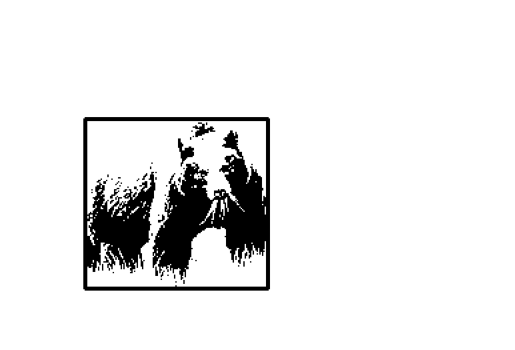

In [10]:
edges = cv2.Canny(thresh, 70, 255)
# contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, _ = cv2.findContours(edges, 1, 2)
# cv2.drawContours(thresh, contours, -1, (0, 255, 0), 2)
all_points = np.vstack(contours)

x, y, w, h = cv2.boundingRect(all_points)
cv2.rectangle(thresh, (x, y), (x+w, y+h), (0, 255, 0), 2)


plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.show()

### Using Colors

error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


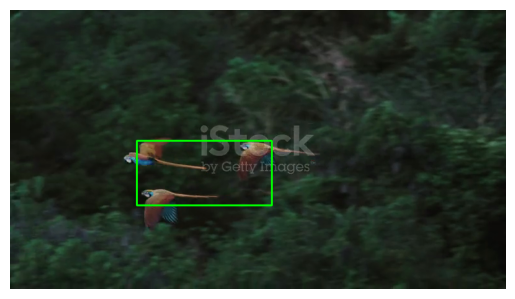

In [16]:
from IPython import display
import time
from PIL import Image



video = cv2.VideoCapture('videos/araras.mp4')

fig, ax = plt.subplots()

while True:
    ret, frame = video.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower, upper = np.array([100, 150, 0]), np.array([140, 255, 255])

    mask = cv2.inRange(hsv, lower, upper)
    mask_ = Image.fromarray(mask)
    bbox = mask_.getbbox()

    if bbox is not None:
        x1, y1, x2, y2 = bbox
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    ax.clear()
    ax.imshow(frame)
    ax.axis('off')
    display.display(fig)
    display.clear_output(wait=True)


video.release()